In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
import re
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.metrics import r2_score


In [ ]:
Pop = pd.read_csv("/content/Tomates+météo - Tableau 1 (1).csv")
Pop

,Date,prix moyen au kg,prix minimal,prix maximal,Production quantité \ntonne(s),Température minimale en °C,Température maximale en °C,précipitations en mm,Ensoleillement en min,Rafales (vitesse du vent) en km/h,catégorie tomates
0,21/06/21,1.50,1.5,1.5,0.200,15.7,24.9,3.8,423,61.2,Tomate ronde cat.I 57-67mm
1,04/12/20,1.50,NaN,NaN,0.100,2.9,6.6,0.8,256,65.9,Tomate ronde cat.I 57-67mm
2,06/11/20,1.10,NaN,NaN,0.100,2.3,13.4,0.0,491,46.8,Tomate ronde cat.I 57-67mm
3,05/11/20,1.10,NaN,NaN,0.100,1.8,11.5,0.0,533,32.4,Tomate ronde cat.I 57-67mm
4,30/10/20,1.05,1.0,1.1,0.100,12.6,15.9,0.0,0,40.7,Tomate ronde cat.I 57-67mm
...,...,...,...,...,...,...,...,...,...,...,...
419,24/06/13,1.10,1.1,1.1,1.120,10.5,19.1,0.0,342,42.6,Tomate ronde cat.I 67-82mm
420,20/06/13,1.50,1.5,1.5,0.075,14.0,21.5,0.8,216,37.1,Tomate ronde cat.I 67-82mm
421,17/06/13,1.50,1.5,1.5,0.020,15.0,27.2,6.8,210,61.1,Tomate ronde cat.I 67-82mm
422,18/09/12,1.10,1.1,1.1,0.180,10.3,20.1,0.0,126,34.2,Tomate ronde cat.I 67-82mm


In [ ]:
Pop = Pop.drop(["prix maximal","prix minimal"], axis=1)
Pop

,Date,prix moyen au kg,Production quantité \ntonne(s),Température minimale en °C,Température maximale en °C,précipitations en mm,Ensoleillement en min,Rafales (vitesse du vent) en km/h,catégorie tomates
0,21/06/21,1.50,0.200,15.7,24.9,3.8,423,61.2,Tomate ronde cat.I 57-67mm
1,04/12/20,1.50,0.100,2.9,6.6,0.8,256,65.9,Tomate ronde cat.I 57-67mm
2,06/11/20,1.10,0.100,2.3,13.4,0.0,491,46.8,Tomate ronde cat.I 57-67mm
3,05/11/20,1.10,0.100,1.8,11.5,0.0,533,32.4,Tomate ronde cat.I 57-67mm
4,30/10/20,1.05,0.100,12.6,15.9,0.0,0,40.7,Tomate ronde cat.I 57-67mm
...,...,...,...,...,...,...,...,...,...
419,24/06/13,1.10,1.120,10.5,19.1,0.0,342,42.6,Tomate ronde cat.I 67-82mm
420,20/06/13,1.50,0.075,14.0,21.5,0.8,216,37.1,Tomate ronde cat.I 67-82mm
421,17/06/13,1.50,0.020,15.0,27.2,6.8,210,61.1,Tomate ronde cat.I 67-82mm
422,18/09/12,1.10,0.180,10.3,20.1,0.0,126,34.2,Tomate ronde cat.I 67-82mm


In [ ]:
Pop.describe()

,prix moyen au kg,Production quantité \ntonne(s),Température minimale en °C,Température maximale en °C,précipitations en mm,Ensoleillement en min,Rafales (vitesse du vent) en km/h
count,421.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,1.264798,0.464830,12.051651,23.908726,1.475236,436.160377,40.075472
std,0.288990,0.776784,3.965298,5.803186,4.417398,266.967955,12.427627
min,0.500000,0.016000,-0.100000,6.600000,0.000000,0.000000,14.400000
25%,1.050000,0.100000,9.800000,20.100000,0.000000,210.000000,31.500000
50%,1.200000,0.240000,12.300000,23.700000,0.000000,447.500000,38.900000
75%,1.500000,0.500000,14.700000,28.000000,0.400000,658.500000,46.800000
max,2.000000,7.680000,23.200000,41.300000,31.900000,906.000000,92.600000


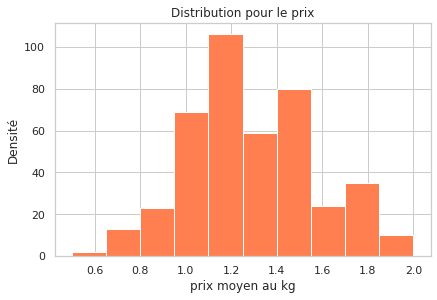

skew= 0.22827047693351454


In [ ]:
plt.hist(Pop['prix moyen au kg'],color ='coral')
plt.title('Distribution pour le prix')
plt.xlabel('prix moyen au kg')
plt.ylabel('Densité')
plt.show()
print ("skew=", Pop['prix moyen au kg'].skew())

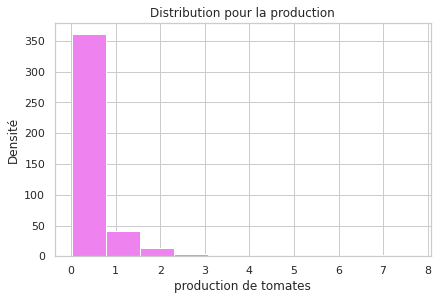

skew= 5.583569472053098


In [ ]:
plt.hist(Pop['Production quantité \ntonne(s)'],color ='violet')
plt.title('Distribution pour la production')
plt.xlabel('production de tomates')
plt.ylabel('Densité')
plt.show()
print ("skew=", Pop['Production quantité \ntonne(s)'].skew())

In [ ]:
Pop['catégorie tomates'].value_counts().to_frame()

,catégorie tomates
Tomate ronde cat.I 57-67mm,372
Tomate ronde cat.I 67-82mm,52


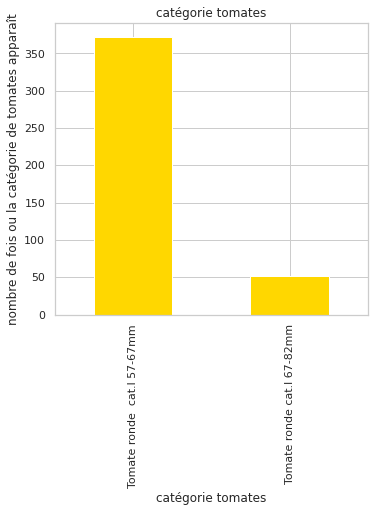

In [ ]:
Pop['catégorie tomates'].value_counts().plot(kind='bar',figsize=(5,5),title= 'catégorie tomates',color ='gold')
plt.xlabel('catégorie tomates')
plt.ylabel("nombre de fois ou la catégorie de tomates apparaît")
plt.show()

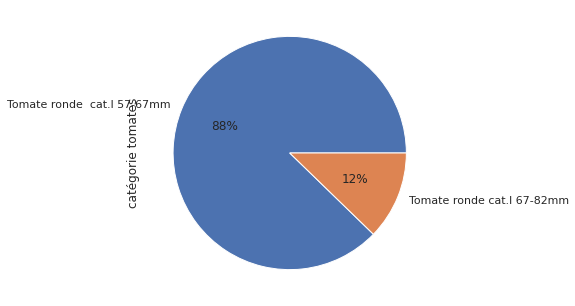

In [ ]:
Pop['catégorie tomates'].value_counts().plot(kind='pie', figsize=[5,5],
          autopct=lambda p: '{:.0f}%'.format(p,(p/100)*Pop['catégorie tomates'].value_counts().sum()))

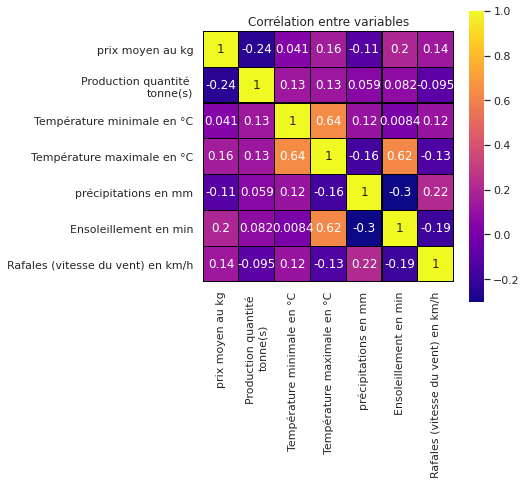

In [ ]:
Corr = Pop.corr()


f, ax = plt.subplots(figsize=(5,5))
plt.title('Corrélation entre variables')


sns.heatmap(Corr,linewidths=0.25,vmax=1.0, square=True, cmap="plasma", linecolor='black', annot=True)
plt.show()

In [ ]:
Pop =  Pop.interpolate() #pour remplacer les valeurs nulles par une valeur moyenne
Pop

,Date,prix moyen au kg,Production quantité \ntonne(s),Température minimale en °C,Température maximale en °C,précipitations en mm,Ensoleillement en min,Rafales (vitesse du vent) en km/h,catégorie tomates
0,21/06/21,1.50,0.200,15.7,24.9,3.8,423,61.2,Tomate ronde cat.I 57-67mm
1,04/12/20,1.50,0.100,2.9,6.6,0.8,256,65.9,Tomate ronde cat.I 57-67mm
2,06/11/20,1.10,0.100,2.3,13.4,0.0,491,46.8,Tomate ronde cat.I 57-67mm
3,05/11/20,1.10,0.100,1.8,11.5,0.0,533,32.4,Tomate ronde cat.I 57-67mm
4,30/10/20,1.05,0.100,12.6,15.9,0.0,0,40.7,Tomate ronde cat.I 57-67mm
...,...,...,...,...,...,...,...,...,...
419,24/06/13,1.10,1.120,10.5,19.1,0.0,342,42.6,Tomate ronde cat.I 67-82mm
420,20/06/13,1.50,0.075,14.0,21.5,0.8,216,37.1,Tomate ronde cat.I 67-82mm
421,17/06/13,1.50,0.020,15.0,27.2,6.8,210,61.1,Tomate ronde cat.I 67-82mm
422,18/09/12,1.10,0.180,10.3,20.1,0.0,126,34.2,Tomate ronde cat.I 67-82mm


In [ ]:
dummy_tomate1 = pd.get_dummies(Pop['catégorie tomates'])
dummy_tomate1

,Tomate ronde cat.I 57-67mm,Tomate ronde cat.I 67-82mm
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
419,0,1
420,0,1
421,0,1
422,0,1


In [ ]:
T =  pd.merge(
    left=Pop,
    right=dummy_tomate1,
    left_index=True,
    right_index=True,
)

T

,Date,prix moyen au kg,Production quantité \ntonne(s),Température minimale en °C,Température maximale en °C,précipitations en mm,Ensoleillement en min,Rafales (vitesse du vent) en km/h,catégorie tomates,Tomate ronde cat.I 57-67mm,Tomate ronde cat.I 67-82mm
0,21/06/21,1.50,0.200,15.7,24.9,3.8,423,61.2,Tomate ronde cat.I 57-67mm,1,0
1,04/12/20,1.50,0.100,2.9,6.6,0.8,256,65.9,Tomate ronde cat.I 57-67mm,1,0
2,06/11/20,1.10,0.100,2.3,13.4,0.0,491,46.8,Tomate ronde cat.I 57-67mm,1,0
3,05/11/20,1.10,0.100,1.8,11.5,0.0,533,32.4,Tomate ronde cat.I 57-67mm,1,0
4,30/10/20,1.05,0.100,12.6,15.9,0.0,0,40.7,Tomate ronde cat.I 57-67mm,1,0
...,...,...,...,...,...,...,...,...,...,...,...
419,24/06/13,1.10,1.120,10.5,19.1,0.0,342,42.6,Tomate ronde cat.I 67-82mm,0,1
420,20/06/13,1.50,0.075,14.0,21.5,0.8,216,37.1,Tomate ronde cat.I 67-82mm,0,1
421,17/06/13,1.50,0.020,15.0,27.2,6.8,210,61.1,Tomate ronde cat.I 67-82mm,0,1
422,18/09/12,1.10,0.180,10.3,20.1,0.0,126,34.2,Tomate ronde cat.I 67-82mm,0,1


In [ ]:
T = T.drop(["catégorie tomates"], axis=1)
T

,Date,prix moyen au kg,Production quantité \ntonne(s),Température minimale en °C,Température maximale en °C,précipitations en mm,Ensoleillement en min,Rafales (vitesse du vent) en km/h,Tomate ronde cat.I 57-67mm,Tomate ronde cat.I 67-82mm
0,21/06/21,1.50,0.200,15.7,24.9,3.8,423,61.2,1,0
1,04/12/20,1.50,0.100,2.9,6.6,0.8,256,65.9,1,0
2,06/11/20,1.10,0.100,2.3,13.4,0.0,491,46.8,1,0
3,05/11/20,1.10,0.100,1.8,11.5,0.0,533,32.4,1,0
4,30/10/20,1.05,0.100,12.6,15.9,0.0,0,40.7,1,0
...,...,...,...,...,...,...,...,...,...,...
419,24/06/13,1.10,1.120,10.5,19.1,0.0,342,42.6,0,1
420,20/06/13,1.50,0.075,14.0,21.5,0.8,216,37.1,0,1
421,17/06/13,1.50,0.020,15.0,27.2,6.8,210,61.1,0,1
422,18/09/12,1.10,0.180,10.3,20.1,0.0,126,34.2,0,1


In [ ]:
T['Date'] = pd.to_datetime(T['Date'])
T

,Date,prix moyen au kg,Production quantité \ntonne(s),Température minimale en °C,Température maximale en °C,précipitations en mm,Ensoleillement en min,Rafales (vitesse du vent) en km/h,Tomate ronde cat.I 57-67mm,Tomate ronde cat.I 67-82mm
0,2021-06-21,1.50,0.200,15.7,24.9,3.8,423,61.2,1,0
1,2020-04-12,1.50,0.100,2.9,6.6,0.8,256,65.9,1,0
2,2020-06-11,1.10,0.100,2.3,13.4,0.0,491,46.8,1,0
3,2020-05-11,1.10,0.100,1.8,11.5,0.0,533,32.4,1,0
4,2020-10-30,1.05,0.100,12.6,15.9,0.0,0,40.7,1,0
...,...,...,...,...,...,...,...,...,...,...
419,2013-06-24,1.10,1.120,10.5,19.1,0.0,342,42.6,0,1
420,2013-06-20,1.50,0.075,14.0,21.5,0.8,216,37.1,0,1
421,2013-06-17,1.50,0.020,15.0,27.2,6.8,210,61.1,0,1
422,2012-09-18,1.10,0.180,10.3,20.1,0.0,126,34.2,0,1


In [ ]:
T['mois'] = T['Date'].dt.month
T['jour'] = T['Date'].dt.day
T['année'] = T['Date'].dt.year

In [ ]:
T = T.drop(["Date"], axis=1)
T

,prix moyen au kg,Production quantité \ntonne(s),Température minimale en °C,Température maximale en °C,précipitations en mm,Ensoleillement en min,Rafales (vitesse du vent) en km/h,Tomate ronde cat.I 57-67mm,Tomate ronde cat.I 67-82mm,mois,jour,année
0,1.50,0.200,15.7,24.9,3.8,423,61.2,1,0,6,21,2021
1,1.50,0.100,2.9,6.6,0.8,256,65.9,1,0,4,12,2020
2,1.10,0.100,2.3,13.4,0.0,491,46.8,1,0,6,11,2020
3,1.10,0.100,1.8,11.5,0.0,533,32.4,1,0,5,11,2020
4,1.05,0.100,12.6,15.9,0.0,0,40.7,1,0,10,30,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
419,1.10,1.120,10.5,19.1,0.0,342,42.6,0,1,6,24,2013
420,1.50,0.075,14.0,21.5,0.8,216,37.1,0,1,6,20,2013
421,1.50,0.020,15.0,27.2,6.8,210,61.1,0,1,6,17,2013
422,1.10,0.180,10.3,20.1,0.0,126,34.2,0,1,9,18,2012


In [ ]:
dummy_mois = pd.get_dummies(T['mois'])
dummy_jour = pd.get_dummies(T['jour'])
dummy_a = pd.get_dummies(T['année'])

In [ ]:

T1 = pd.merge(
    left=T,
    right=dummy_mois,
    left_index=True,
    right_index=True,
)

T2 = pd.merge(
    left=T1,
    right=dummy_a,
    left_index=True,
    right_index=True,
)

T3 = pd.merge(
    left=T2,
    right=dummy_jour,
    left_index=True,
    right_index=True,
)

In [ ]:
T3 = T3.drop(["mois","jour","année"], axis=1)
T3

,prix moyen au kg,Production quantité \ntonne(s),Température minimale en °C,Température maximale en °C,précipitations en mm,Ensoleillement en min,Rafales (vitesse du vent) en km/h,Tomate ronde cat.I 57-67mm,Tomate ronde cat.I 67-82mm,1,2,3,4,5,6_x,7_x,8_x,9_x,10_x,11_x,12_x,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,6_y,7_y,8_y,9_y,10_y,11_y,12_y,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.50,0.200,15.7,24.9,3.8,423,61.2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1.50,0.100,2.9,6.6,0.8,256,65.9,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.10,0.100,2.3,13.4,0.0,491,46.8,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.10,0.100,1.8,11.5,0.0,533,32.4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.05,0.100,12.6,15.9,0.0,0,40.7,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1.10,1.120,10.5,19.1,0.0,342,42.6,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
420,1.50,0.075,14.0,21.5,0.8,216,37.1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
421,1.50,0.020,15.0,27.2,6.8,210,61.1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
422,1.10,0.180,10.3,20.1,0.0,126,34.2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Prix = T3['prix moyen au kg'] 
Production = T3['Production quantité \ntonne(s)']

**Modélisation**

In [ ]:
#pour le prix

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X =  T3.drop(['prix moyen au kg'], axis=1)
y = Prix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Prix**

In [ ]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
forest_reg.score(X_test, y_test)

0.5446516685100411

In [ ]:
forest_reg.score(X_train, y_train)

0.951076888877461

In [ ]:
y_tr = forest_reg.predict(X_train)
y_pred = forest_reg.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.20366988354895205

In [ ]:
sqrt(mean_squared_error(y_train, y_tr))

0.062298458494117026

In [ ]:
mean_absolute_error(y_train, y_tr)

0.04590456081081065

In [ ]:
mean_absolute_error(y_test, y_pred)

0.1530464843749998

In [ ]:
print(r2_score(y_test, y_pred))
print(r2_score(y_train, y_tr))

0.5446516685100411
0.9510768888774609


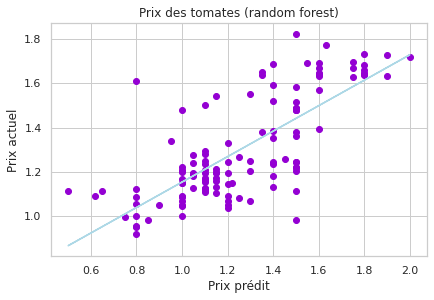

In [ ]:
plt.scatter(y_test, y_pred, color = 'darkviolet')
plt.title('Prix des tomates (random forest)')
plt.xlabel('Prix prédit')
plt.ylabel('Prix actuel')
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='lightblue')
plt.show()

In [ ]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [19, 35, 46, 79, 98, 100, 115, 123]}

In [ ]:
from sklearn.metrics import make_scorer

scorer = make_scorer(mean_squared_error, squared = False )
g1 = GridSearchCV(estimator = forest_reg, param_grid = param_grid, 
cv = 5, n_jobs = 1, verbose = 0, return_train_score=True, scoring = scorer)

In [ ]:
g1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [ ]:
g1.best_score_

0.2253337220821961

In [ ]:
best_modl = g1.best_estimator_
print(best_modl)
best_preds = best_modl.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, best_preds)))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=79, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
0.2436189296247927


In [ ]:
g1.best_params_

{'bootstrap': True, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 79}

In [ ]:
mean_absolute_error(y_test, best_preds)

0.20544370548143154

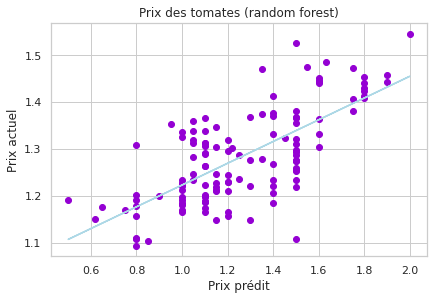

In [ ]:
plt.scatter(y_test, best_preds, color = 'darkviolet')
plt.title('Prix des tomates (random forest)')
plt.xlabel('Prix prédit')
plt.ylabel('Prix actuel')
z = np.polyfit(y_test, best_preds, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='lightblue')
plt.show()

**Production**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
forest_reg.score(X_test, y_test)

0.17678458514400341

In [ ]:
forest_reg.score(X_train, y_train)

0.8287841760591974

In [ ]:
y_pred = forest_reg.predict(X_test)
y_tr = forest_reg.predict(X_train)

In [ ]:
sqrt(mean_squared_error(y_test, y_pred))

0.7799181490532556

In [ ]:
sqrt(mean_squared_error(y_train, y_tr))

0.30470574233151104

In [ ]:
mean_absolute_error(y_train, y_tr)

0.1372663851351351

In [ ]:
mean_absolute_error(y_test, y_pred)

0.3368321093750001

In [ ]:
print(r2_score(y_test, y_pred))
print(r2_score(y_train, y_tr))

0.17678458514400341
0.8287841760591973


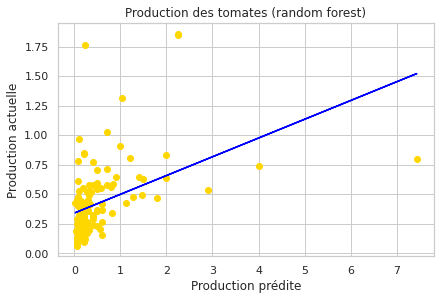

In [ ]:
plt.scatter(y_test, y_pred, color = 'gold')
plt.title('Production des tomates (random forest)')
plt.xlabel('Production prédite')
plt.ylabel('Production actuelle')
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='blue')
plt.show()

In [ ]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [19, 35, 46, 79, 98, 100, 115, 123]}

In [ ]:
scorer = make_scorer(mean_squared_error, squared = False )
g2 = GridSearchCV(estimator = forest_reg, param_grid = param_grid, 
cv = 5, n_jobs = 1, verbose = 0, return_train_score=True, scoring = scorer)

In [ ]:
g2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [ ]:
g2.best_score_

0.7540352335953744

In [ ]:
best_modl = g2.best_estimator_
print(best_modl)
best_preds = best_modl.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, best_preds)))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=19, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
0.7956092769846022


In [ ]:
g2.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 19}

In [ ]:
mean_absolute_error(y_test, best_preds)

0.3524860197368421

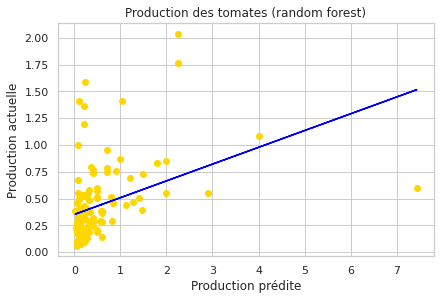

In [ ]:
plt.scatter(y_test, best_preds, color = 'gold')
plt.title('Production des tomates (random forest)')
plt.xlabel('Production prédite')
plt.ylabel('Production actuelle')
z = np.polyfit(y_test, best_preds, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='blue')
plt.show()